### Loading various libraries

In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import re


import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import pandas as pd
import random

### Importing the 20newsgroup training data

In [115]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [116]:
list(mydata_train)

['data', 'filenames', 'target_names', 'target', 'DESCR']

In [117]:
print('Training data size:', len(mydata_train['data']))

Training data size: 11314


In [118]:
# Printing all the categories
mydata_train.target_names 

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [119]:
# Finding frequency of each category
targets, frequency = np.unique(mydata_train.target, return_counts=True)
targets, frequency 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 array([480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591,
        594, 593, 599, 546, 564, 465, 377], dtype=int64))

In [120]:
targets_str = np.array(mydata_train.target_names)
print(list(zip(targets_str, frequency)))

[('alt.atheism', 480), ('comp.graphics', 584), ('comp.os.ms-windows.misc', 591), ('comp.sys.ibm.pc.hardware', 590), ('comp.sys.mac.hardware', 578), ('comp.windows.x', 593), ('misc.forsale', 585), ('rec.autos', 594), ('rec.motorcycles', 598), ('rec.sport.baseball', 597), ('rec.sport.hockey', 600), ('sci.crypt', 595), ('sci.electronics', 591), ('sci.med', 594), ('sci.space', 593), ('soc.religion.christian', 599), ('talk.politics.guns', 546), ('talk.politics.mideast', 564), ('talk.politics.misc', 465), ('talk.religion.misc', 377)]


We can see that all of the categories have decent amount of samples and doesn't have high imbalance. 

### Importing the 20newsgroup test data

In [182]:
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [183]:
print('Testing data size:', len(mydata_test['data']))

Testing data size: 7532


### Data Preparation: 

We will perform preparation steps such as Tokenization, Convert everything to lowercase, Removing stopwords, Stemming, Lemmatizing, and converting text data to a vector representation

In [121]:
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

,data,target
0,I was wondering if anyone out there could enli...,7
1,A fair number of brave souls who upgraded thei...,4
2,"well folks, my mac plus finally gave up the gh...",4
3,\nDo you have Weitek's address/phone number? ...,1
4,"From article <C5owCB.n3p@world.std.com>, by to...",14


In [122]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_train_df['data'] = mydata_train_df.data.map(alphanumeric).map(punc_lower)
mydata_train_df.head()

,data,target
0,i was wondering if anyone out there could enli...,7
1,a fair number of brave souls who upgraded thei...,4
2,well folks my mac plus finally gave up the gh...,4
3,\ndo you have weitek s address phone number ...,1
4,from article world std com by tombaker ...,14


In [184]:
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [185]:
# Text preprocessing steps - remove numbers, captial letters and punctuation
alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

mydata_test_df['data'] = mydata_test_df.data.map(alphanumeric).map(punc_lower)
mydata_test_df.head()

,data,target
0,i am a little confused on all of the models of...,7
1,i m not familiar at all with the format of the...,5
2,\nin a word yes \n,0
3,\nthey were attacking the iraqis to drive them...,17
4,\ni ve just spent two solid months arguing tha...,19


### Count Vectorizer

In [127]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')

X_train_cv = count_vect.fit_transform(mydata_train_df.data)  # fit_transform learns the vocab and one-hot encodes
X_test_cv = count_vect.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes

print(X_train_cv.shape)
print(type(X_train_cv))

(11314, 67822)
<class 'scipy.sparse.csr.csr_matrix'>


In [128]:
X_train_cv_df = pd.DataFrame(X_train_cv.todense())
X_train_cv_df.columns = sorted(count_vect.vocabulary_)
X_train_cv_df.head()

,aa,aaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaah,aaahh,aaahhhh,aaai,aacc,aachen,...,zznkjz,zznkzz,zznp,zzrk,zzz,zzzoh,zzzzzz,zzzzzzt,³ation,ýé
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [49]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(mydata_train_df.data) #X_train_counts
X_train_tfidf.shape

(11314, 130107)

In [66]:
# Creating a document-term matrix using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfV = TfidfVectorizer(stop_words='english') 
# tfidfV = TfidfVectorizer(ngram_range=(1, 2), binary =True, stop_words='english') 

X_train_tfidfV = tfidfV.fit_transform(mydata_train_df.data) # fit_transform learns the vocab and one-hot encodes 
X_test_tfidfV = tfidfV.transform(mydata_test_df.data) # transform uses the same vocab and one-hot encodes 

# print the dimensions of the training set (text messages, terms) 
print(X_train_tfidfV.shape)
print(type(X_train_tfidfV))

(11314, 81918)
<class 'scipy.sparse.csr.csr_matrix'>


In [68]:
X_train_tfidfV_df = pd.DataFrame(X_train_tfidfV.todense())
X_train_tfidfV_df.columns = sorted(tfidfV.vocabulary_)
X_train_tfidfV_df.head()

,aa,aaa,aaaa,aaaaaaaaaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg,aaaaagggghhhh,aaaarrgghhhh,aaah,aaahh,aaahhhh,...,çon,ère,ée,égligent,élangea,érale,ête,íålittin,ñaustin,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Neural Network

In [166]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [265]:
# Lemmatizing (Note other processing like alphanumemric remove and lowercase has already been done)
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return(" ".join([lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]))

mydata_train_df["data_lemmatized"] = mydata_train_df.data.apply(lemmatize_text)
mydata_test_df["data_lemmatized"] = mydata_test_df.data.apply(lemmatize_text)


# Using TFidf Vectorizer and Removing words that appear in less that 0.05 percent of documents
tfidfV = TfidfVectorizer(stop_words='english', min_df = 0.0005) 


# Data  for Neural Networks
xTrain = tfidfV.fit_transform(mydata_train_df.data_lemmatized)
yTrainHot = to_categorical(mydata_train_df["target"], num_classes=20)
xTest = tfidfV.transform(mydata_test_df.data_lemmatized)


# New shape for neural network. Reduced dimesnions to 13946 to keep only important words and faster the training process.
print(xTrain.shape)

(11314, 11445)


In [259]:
# Defining the model
model1 = Sequential()
model1.add(Dense(1500, input_dim=xTrain.shape[1], activation='relu'))
model1.add(Dense(20, activation='softmax'))
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Model checkpoints and stoppers. Save the best weights and stops the model when no increase in performance to save time.
esc = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')
cp = ModelCheckpoint(filepath="weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True)

batch_size = 128

# fitting the model.
m1 = model1.fit(xTrain, yTrainHot, batch_size=batch_size, epochs=500, callbacks=[esc, cp], validation_split=0.2)

Train on 9051 samples, validate on 2263 samples
Epoch 1/500
9051/9051 [==============================] - 61s 7ms/step - loss: 2.1893 - acc: 0.5833 - val_loss: 1.2479 - val_acc: 0.7371

Epoch 00001: val_loss improved from inf to 1.24795, saving model to weights.hdf5
Epoch 2/500
9051/9051 [==============================] - 54s 6ms/step - loss: 0.7056 - acc: 0.8575 - val_loss: 0.8706 - val_acc: 0.7548

Epoch 00002: val_loss improved from 1.24795 to 0.87064, saving model to weights.hdf5
Epoch 3/500
9051/9051 [==============================] - 54s 6ms/step - loss: 0.3174 - acc: 0.9350 - val_loss: 0.8248 - val_acc: 0.7605

Epoch 00003: val_loss improved from 0.87064 to 0.82477, saving model to weights.hdf5
Epoch 4/500
9051/9051 [==============================] - 54s 6ms/step - loss: 0.1860 - acc: 0.9619 - val_loss: 0.8270 - val_acc: 0.7574

Epoch 00004: val_loss did not improve from 0.82477
Epoch 5/500
9051/9051 [==============================] - 55s 6ms/step - loss: 0.1377 - acc: 0.9691 - v

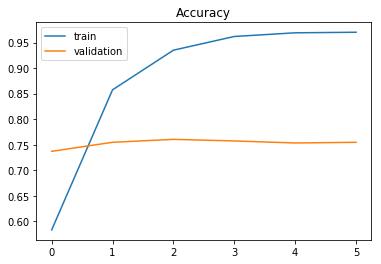

In [267]:
# Training Accuracy History
plt.title('Accuracy')
plt.plot(m1.history['acc'], label='train')
plt.plot(m1.history['val_acc'], label='validation')
plt.legend()
plt.show();

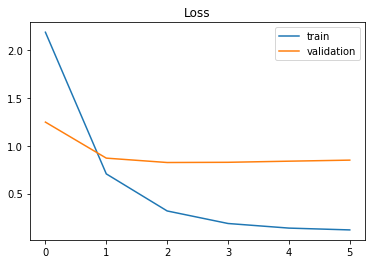

In [269]:
# Training Loss History
plt.title('Loss')
plt.plot(m1.history['loss'], label='train')
plt.plot(m1.history['val_loss'], label='validation')
plt.legend()
plt.show();

In [266]:
# Testing

# loading the best weights
model1.load_weights("weights.hdf5")

# predicting classes for testing cases.
yP1 = model1.predict(xTest)
yP2 = np.argmax(yP1,axis=1)

# Accuracy
np.mean(yP2 == mydata_test_df["target"])

0.6931757833244823